In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from matplotlib import pyplot as plt
%matplotlib inline

,SNC.TO,TD,^BVSP,VALE3.SA
count,495.000000,486.000000,473.00000,473.000000
mean,40.183113,54.332191,90931.10148,49.069701
std,14.057049,2.295242,10657.28001,4.686104
min,15.488437,45.834755,69815.00000,38.779011
25%,25.961022,53.115732,83118.00000,46.490002
50%,45.897449,54.250505,89710.00000,49.660000
75%,53.429029,55.958183,99469.00000,52.000000
max,59.623077,58.293087,112616.00000,62.200001


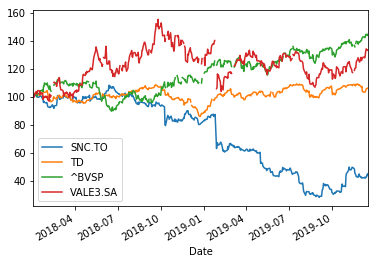

In [2]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass
(df / df.iloc[0] * 100).plot()
df.describe()

In [14]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [6]:
log_returns.tail()

,SNC.TO,TD,^BVSP,VALE3.SA
Date,,,,
2019-12-12,0.011641,0.007573,0.011077,0.021379
2019-12-13,0.000429,0.011786,0.003248,0.015182
2019-12-16,0.060272,0.004958,-0.005961,-0.007843
2019-12-17,-0.027399,0.002294,0.006414,0.001499
2019-12-17,0.000000,0.000000,0.000000,0.000000


In [16]:
std_returns * 100

SNC.TO      2.834972
TD          0.852052
^BVSP       1.275209
VALE3.SA    1.993267
dtype: float64

In [17]:
var_returns * 100

SNC.TO      1.270772
TD          0.114789
^BVSP       0.257118
VALE3.SA    0.628204
dtype: float64

In [18]:
cov_returns

,SNC.TO,TD,^BVSP,VALE3.SA
SNC.TO,0.200927,0.013910,0.010315,0.018281
TD,0.013910,0.018150,0.011031,0.016877
^BVSP,0.010315,0.011031,0.040654,0.030730
VALE3.SA,0.018281,0.016877,0.030730,0.099328


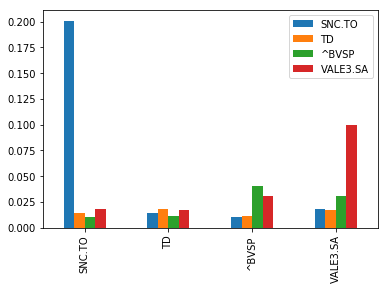

In [8]:
cov_returns.plot(kind='bar')

In [9]:
cor_returns

,SNC.TO,TD,^BVSP,VALE3.SA
SNC.TO,1.000000,0.227310,0.134496,0.152492
TD,0.227310,1.000000,0.410244,0.403341
^BVSP,0.134496,0.410244,1.000000,0.483588
VALE3.SA,0.152492,0.403341,0.483588,1.000000


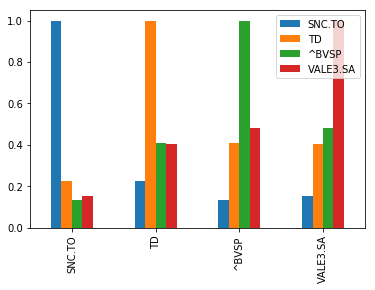

In [10]:
cor_returns.plot(kind='bar')